## Sections
* Singular Value Decomposition (SVD)
* SVD Coding Exercises
* Principal Component Analysis (PCA)
* PCA Coding Exercises

---

## Singular Value Decomposition (SVD)

![](./NoteFiles/SVD1.png)
![](./NoteFiles/SVD2.png)

---

## SVD Coding Exercises

In [18]:
import os
import gzip
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

#===============================================================================
# Testing SVD Theory on a Model Matrix
#===============================================================================

## Setting some definitions:
# X = Input matrix
# U = U matrix 
# S = Sigma matrix (diagonal matrix of ranks)
# Vt = Transposed V matrix
# In theory, X = USVt

# Init model matrix.
X = np.matrix([
    [2, 4, 6],
    [5, 1, 3],
    [2, 9, 4],
    [7, 3, 1],
    [6, 3, 4]
])

# Compute SVD.
U, S, Vt = np.linalg.svd(X)

# Convert sigma matrix from array to diag matrix and if necessary add rows of
# zeroes to the sigma matrix (for the case that num rows X > num cols X) to
# create an S long (Sl) version of the sigma matrix.
S = np.diag(S)

if X.shape[0] > X.shape[1]:
    Sl = np.vstack([S, np.zeros([X.shape[0] - len(S), X.shape[1]])])

# Print the S matrix:
print("S matrix:"  + "\n" + str(S) + "\n")

# Test that the SVD is not a farce! X = USVt
print("Recreating X using SVD:" + "\n" + str(np.dot(U, np.dot(Sl, Vt))) + "\n")

# Now testing some of the intuition of the SVD.
# XtX = the correlation matrix among the columns of X, i.e. the inner products
# of the input data itself. Large values represent similarity and small values
# represent places that are more orthagonal (less similar). 
Xt = np.transpose(X)
XtX = np.dot(Xt, X)

# Given the definition of the SVD as X = USVt, we can plug USVt in for X in 
# the correlation matrix XtX and perform the following calculation.
# XtX = VSUtUSVt = VS^2Vt

# VS^2Vt is the eigenvalue decomposition of the correlation matrix XtX where
# S^2 are the eigenvalues of XtX and V are the eigenvectors of XtX.

# S^2 = eigenvalues of XtX
print("S^2 = Eigenvalues of XtX \n")
print("S^2:" + "\n" + str(np.square(S)) + "\n")
print("Eigenvalues of XtX:" + "\n" + str(np.linalg.eig(XtX)[0]), "\n")

# V = eigenvectors of XtX
np.transpose(Vt)
np.linalg.eig(XtX)[1]

# Thus, in the singular value decomposition USVt, V is just the eigenvectors
# of the correlation matrix X and S (sigma) is the square root of the 
# eigenvalues of the same correlation matrix X.

S matrix:
[[15.74968042  0.          0.        ]
 [ 0.          6.98899268  0.        ]
 [ 0.          0.          3.88607102]]

Recreating X using SVD:
[[2. 4. 6.]
 [5. 1. 3.]
 [2. 9. 4.]
 [7. 3. 1.]
 [6. 3. 4.]]

S^2 = Eigenvalues of XtX 

S^2:
[[248.05243339   0.           0.        ]
 [  0.          48.84601863   0.        ]
 [  0.           0.          15.10154798]]

Eigenvalues of XtX:
[248.05243339  48.84601863  15.10154798] 



matrix([[ 0.59397049,  0.78346907, -0.18268899],
        [ 0.61863483, -0.58998965, -0.51884791],
        [ 0.51428591, -0.19516258,  0.8351177 ]])

---

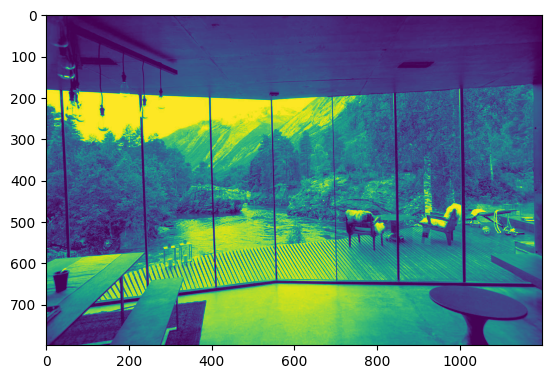

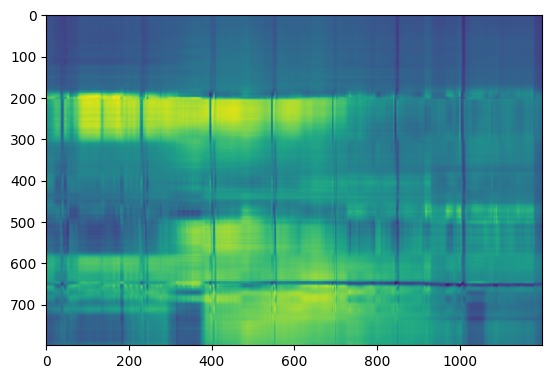

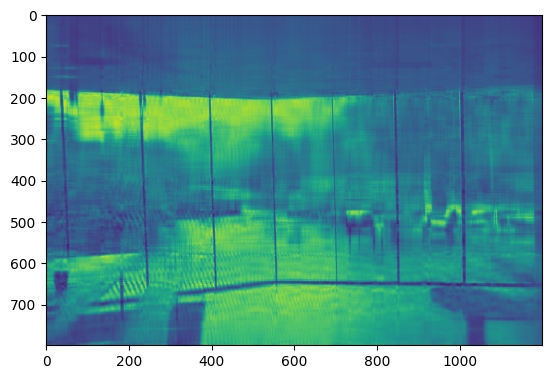

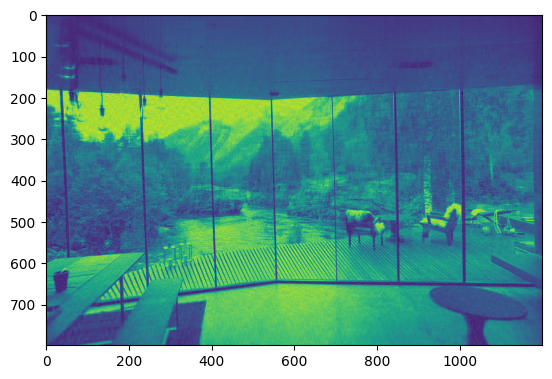

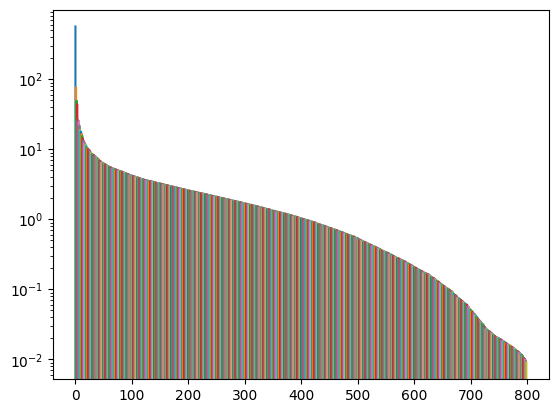

In [10]:
#===============================================================================
# Testing Some Image Compression with SVD
#===============================================================================

# Load image, convert to grayscale (1 channel), view image.
img = imread('./Data/demo.jpeg')
X = np.mean(img, -1)

plt.imshow(X)
plt.show()

# Perform SVD on image X using the economy SVD indicated with the full_matrices
# argument. This cuts off the zero rows of the sigma matrix.
U, S, Vt = np.linalg.svd(X, full_matrices = False)
S = np.diag(S)

# Subset to the first 5 rows/cols of the U, S, Vt matrices and reconstruct a
# compressed version of X using the fancy @ matmul operator. Then view compressed image.
i = 5
X_comp = U[:, :i] @ S[0:i, :i] @ Vt[:i, :]

plt.imshow(X_comp)
plt.show()

# Subset to the first 20 rows/cols.
i = 20
X_comp = U[:, :i] @ S[0:i, :i] @ Vt[:i, :]

plt.imshow(X_comp)
plt.show()

# Subset to the first 100 rows/cols.
i = 100
X_comp = U[:, :i] @ S[0:i, :i] @ Vt[:i, :]

plt.imshow(X_comp)
plt.show()

# Plot the eigenvalues (square root technically) to see where the information
# content of the image starts to fall off (plotting sigma matrix).
plt.figure(1)
plt.semilogy(S)
plt.show()

---

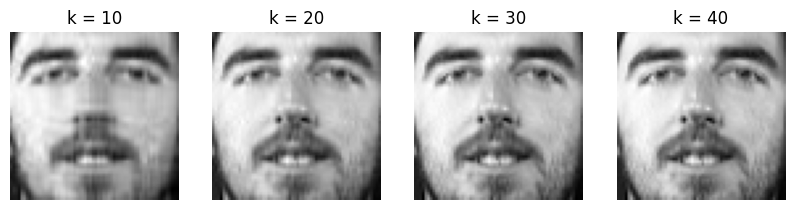

In [11]:
#===============================================================================
# Visualizing the Accuracy of Rank-K Approximations of an Images Using SVD
#===============================================================================

# This exercise uses the "Eigenfaces" dataset.

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

data = datasets.fetch_olivetti_faces()
images = data.images

#-------------------------------------------------------------------------------
# Select a random image from the dataset, and create a rank-k approximation of 
# it using k = [10, 20, 30, 40]. 
#-------------------------------------------------------------------------------

image = images[100]

k_approxs = []

for k in [10, 20, 30, 40]:

    # Compute the SVD of M.
    U, S, Vt = np.linalg.svd(image, full_matrices=False)

    # Take the first k columns of U and the first k rows of Vt.
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vtk = Vt[:k, :]

    # Compute the rank-k approximation of M.
    Mk = Uk @ Sk @ Vtk

    k_approxs.append(Mk)

# Plot the images. 
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(k_approxs[i], cmap='gray')
    ax.set_title(f'k = {i * 10 + 10}')
    ax.axis('off')
plt.show()

---

## Principal Component Analysis (PCA)

![](./NoteFiles/PCA1.png)
![](./NoteFiles/PCA2.png)
![](./NoteFiles/PCA3.png)
![](./NoteFiles/PCA4.png)
![](./NoteFiles/PCA5.png)

---

## PCA Coding Exercises

---

In [12]:
#===============================================================================
# Testing PCA Theory on a Model Matrix
#===============================================================================

# PCA intuitive explanation: a hierarchical coordinate system that captures
# the directions in an input data matrix X that explain the most variance 
# in X.

# Using the same input X matrix as in the SVD theory section above. First 
# calculate a mean centered matrix B by substracting mean of the rows of X
# from X.
X_mean = np.mean(X, axis = 0)
B = X - X_mean

# Calculate covariance matrix.
cov = np.cov(B, rowvar = False)

# Compute eigenvalues and eigenvectors of the covariance matrix, then order
# them by the size of the eigenvalues.
eigval, eigvec = np.linalg.eigh(cov)
index = np.argsort(eigval)[::-1]
eigvec = eigvec[:, index]
eigval = eigval[index]

# This is equivalent to scaling down a large matrix using eigenvectors. If M 
# is a large matrix we can look for a vector o and a scalar n such that 
# M * o = n * o where o are eigenvectors and n are eigenvalues. By the same 
# logic, in the PCA case: cov * eigvec = eigval * eigvec
cov @ eigvec
eigval * eigvec

# In PCA, T = BV where T are the principal components and V are the eigenvectors
# (called the loadings in PCA).
T = B @ eigvec

# Putting it all together in a function that calculates PCA given an input
# matrix X.
def PCA(X):

	X_mean = np.mean(X, axis = 0)
	B = X - X_mean

	cov = np.cov(B, rowvar = False)

	eigval, eigvec = np.linalg.eigh(cov)
	index = np.argsort(eigval)[::-1]
	eigvec = eigvec[:, index]
	eigval = eigval[index]

	T = B @ eigvec

	return T

# Using SVD, one can compute B = USVt, which allows for the conversion between
# SVD values and PCA loadings.
U, S, Vt = np.linalg.svd(B, full_matrices = False)
S = np.diag(S)

# Plugging in USVt for B in the PCA equation: T = BV.
T_alt = U @ S @ Vt @ eigvec


---

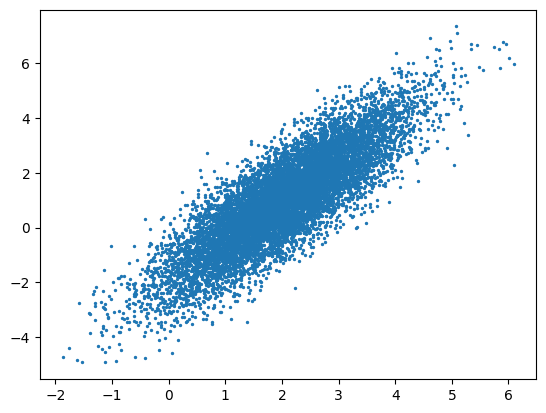

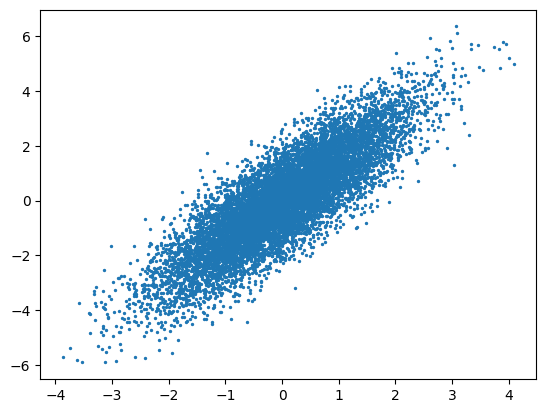

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [13]:
#===============================================================================
# Using PCA on a Transformed Matrix with Known Properties
#===============================================================================

# We are going to take a matrix with normal gaussian properties centered at
# 0, 0 and then transform it to give it known properties, we will then test
# whether PCA is able to find these properties. This demo is inspired by
# Steve Brunton's series on PCA.

# Data will be centered at 2, 1.
center = np.array([2, 1])

# Data will be stretched by a factor of 2 in the x-direction and compressed
# by a factor of 0.5 in the y-direction.
stretch = np.array([2, 0.5])

# Data will be rotated by a factor of pi/3 using the rotation matrix.
theta = np.pi/3

rotate = np.array([[np.cos(theta), -np.sin(theta)],
                   [np.sin(theta), np.cos(theta)]]) 

# Create transformed matrix with 10,000 data points.
X = rotate @ np.diag(stretch) @ np.random.randn(2, 10000) + np.diag(center) @ np.ones([2, 10000])

# Plot X to make sure we did the transformations correctly.
fig = plt.figure()
fig.add_subplot(111)
plt.scatter(X[0,:], X[1,:], s=2)
plt.show()

# Calculate mean centered matrix B.
X_mean = np.mean(X, axis = 1)
B = X - np.tile(X_mean, (10000, 1)).T

# Check that mean centered matrix B looks correct.
fig = plt.figure()
fig.add_subplot(111)
plt.scatter(B[0,:], B[1,:], s=2)
plt.show()

# Find principal components via SVD.
U, S, Vt = np.linalg.svd(B / np.sqrt(10000), full_matrices = False)

# The resultant sigma matrix S has values of ~2 and ~0.5 which tells you that
# the first principal component has a lot of variance (the stretch of factor 
# 2 in the x-direction) and the second principal component has less variance
# the compression of factor 0.5 in the y-direction.

# The resultant U matrix tells us how the distribution is rotated. Note that
# the transformation induced by the rotate matrix is the same as the U matrix.
U
rotate

---

Difference between Features2_SVD and Features2_sklearn:0.0


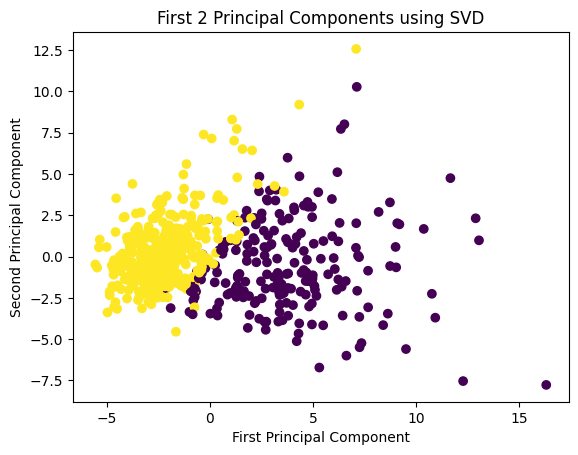

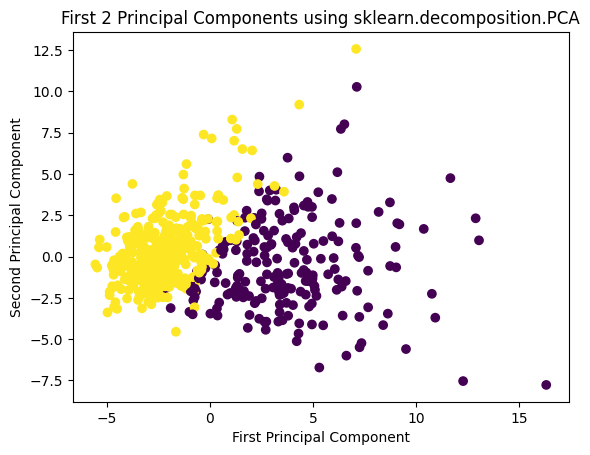

In [16]:
#===============================================================================
# Plot First Two Principal Components in Space
#===============================================================================

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# This example uses the sklearn cancer dataset. Principle components are plotted
# after both calculating PCA by hand using SVD and using the sklearn.decomposition.PCA.

cancer = datasets.load_breast_cancer()


features = np.array(pd.DataFrame(cancer.data, columns=cancer.feature_names))
labels = np.array(pd.DataFrame(cancer.target, columns=['label']))

# Rescale features to be mean 0 and standard deviation 1.
features = StandardScaler().fit_transform(features)

# --- First 2 Principal Components using SVD ---

U, S, Vt = np.linalg.svd(features, full_matrices=False)

# Pull out the first two principle components, first two rows of the right 
# singular vectors Vt.
PC2_SVD = np.array(Vt[:2, :])
PC2_SVD = -PC2_SVD # Flip the sign to match the results from sklearn.

# Project the features onto the first two principal components.
Features2_SVD = features @ PC2_SVD.T

# --- First 2 Principal Components using sklearn.decomposition.PCA ---

PC2_sklearn = PCA(n_components=2)

# Project the features onto the first two principal components.
Features2_sklearn = PC2_sklearn.fit_transform(features)

# Verify that the results are the same.
print("Difference between Features2_SVD and Features2_sklearn:" + str(np.sum(np.abs(Features2_sklearn - Features2_SVD)).round(5)))

# Create scatterplots using both PCA methods.
plt.scatter(Features2_SVD[:, 0], Features2_SVD[:, 1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First 2 Principal Components using SVD')
plt.show()

plt.scatter(Features2_sklearn[:, 0], Features2_sklearn[:, 1], c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First 2 Principal Components using sklearn.decomposition.PCA')
plt.show()


---